In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import pickle
from matplotlib_venn import venn3, venn3_circles

In [2]:
folder = "BBBC036"
fh_path = f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental_results/{folder}/First_hit/"
map_path = f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental_results/{folder}/First_hit/"
folder_names = ["CellProfiler","Pretrained","Combined_set"] # "Indiv_dataset",
strategies = ["CellProfiler", "ImageNet Pretrained", "Weakly Supervised"]
sphering_params_epoch = ["1e-2", "1e-3", "1e-3_e30"] # "1e-3_e30",
partitions = ["/", "/conv6a/", "/Cells_out/"] # "/Cells_out/conv6a/",
file_names = ["cellprofiler", "efn128_pretrained_conv6a", "efn128_combinedcellsout_conv6a"] #"FH_efn128cellsout_conv6a", 
aggregation_level = "treatment_level"

In [ ]:
main_colors = ["tab:pink","tab:olive","tab:cyan"] 
high_colors = ["deeppink", "gold", "deepskyblue"]

# First hit results

In [ ]:
first_hits = []
for k in range(len(strategies)):
  df = pd.read_csv(f"{fh_path}{folder_names[k]}{partitions[k]}{file_names[k]}_{sphering_params_epoch[k]}_{aggregation_level}.csv", index_col=0)
  df["Strategy"] = strategies[k]
  first_hits.append(df)
first_hits = pd.concat(first_hits).reset_index()

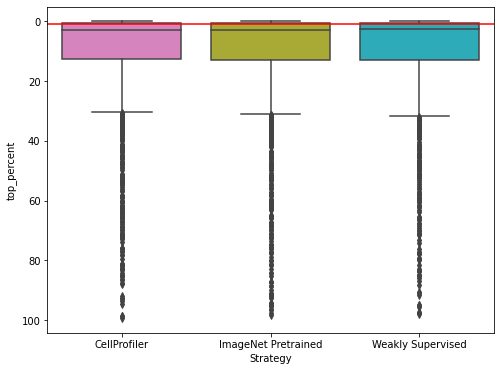

In [ ]:
plt.figure(figsize=(8,6))
g = sb.boxplot(data=first_hits, x="Strategy", y="top_percent", palette=main_colors)
g.invert_yaxis()
plt.axhline(y=1, color='r', linestyle='-')

[(0.0, 5.0)]

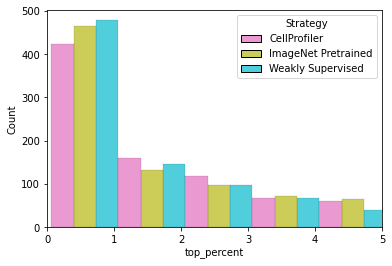

In [ ]:
g = sb.histplot(first_hits, x="top_percent", hue="Strategy", binwidth=1, multiple="dodge", palette=main_colors)
g.set(xlim=(0, 5))

[(1.0, 10.0)]

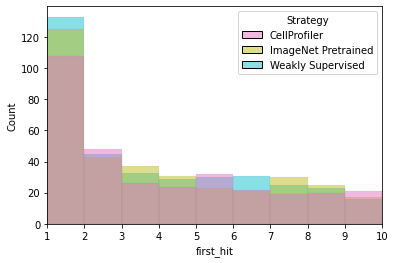

In [ ]:
g = sb.histplot(first_hits, x="first_hit", hue="Strategy", binwidth=1, multiple="layer", palette=main_colors)
g.set(xlim=(1, 10))

,Strategy,index,Compound,Treatment,first_hit,top_percent
0,CellProfiler,407,407,407,407,407
1,ImageNet Pretrained,453,453,453,453,453
2,Weakly Supervised,454,454,454,454,454


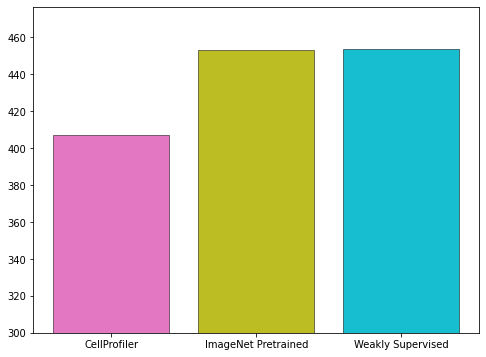

In [ ]:
counts = first_hits[first_hits.top_percent <= 1].groupby("Strategy").count().reset_index()
fig, ax = plt.subplots(figsize=(8,6))
b = plt.bar(counts.Strategy, counts.Compound)
t = ax.set_ylim([300, None])
for k in range(3): 
  b[k].set_color(main_colors[k])
  b[k].set_linewidth(0.5)
  b[k].set_edgecolor('black')
counts

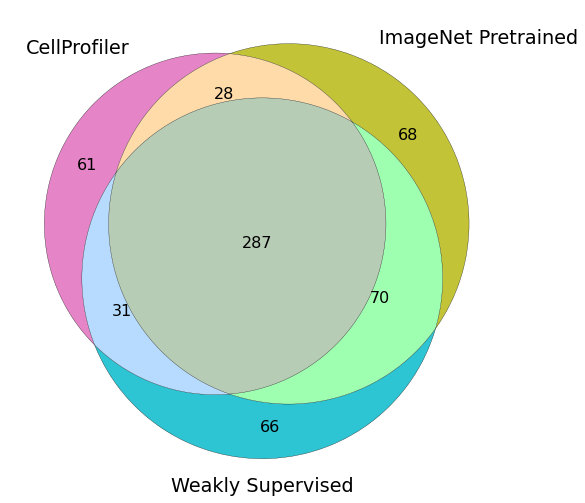

In [ ]:
sets = []
for k in range(len(strategies)):
  s = set(first_hits.query(f"top_percent <= 1. & Strategy == '{strategies[k]}'").Compound)
  sets.append(s)

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,9))
venn3(sets, strategies, set_colors=main_colors, alpha=0.9)
venn3_circles(sets, linewidth=0.3)

# Ranking performance and enrichment analysis

In [ ]:
folder = "BBBC036"
fh_path = f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental_results/{folder}/mAP_FoE/"
map_path = f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental_results/{folder}/mAP_FoE/"
file_names = ["cellprofiler", "efn128_pretrained_conv6a", "efn128_combinedcellsout_conv6a"] #"FH_efn128cellsout_conv6a", 
sphering_params_epoch = ["1e-2", "1e-3", "1e-3_e30"]

In [ ]:
map_foe = []
for k in range(len(strategies)):
  print(strategies[k])
  df = pd.read_csv(f"{fh_path}{folder_names[k]}{partitions[k]}{file_names[k]}_{sphering_params_epoch[k]}.csv", index_col=0)
  df["Strategy"] = strategies[k]
  map_foe.append(df)
map_foe = pd.concat(map_foe).reset_index()

CellProfiler
ImageNet Pretrained
Weakly Supervised


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 73.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 70.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


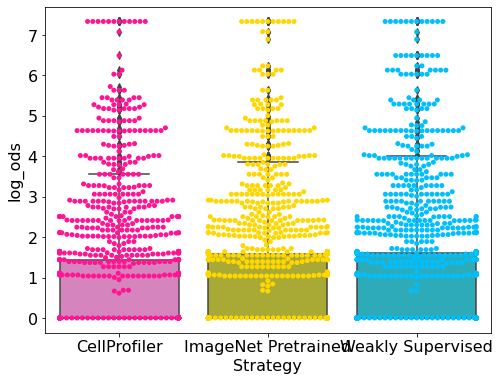

In [ ]:
plt.figure(figsize=(8,6))
map_foe["log_ods"] = np.log(map_foe["ods_ratio"]+1)
g = sb.swarmplot(data=map_foe, x="Strategy", y="log_ods", palette=high_colors)
g = sb.boxplot(data=map_foe, x="Strategy", y="log_ods", palette=main_colors)


In [ ]:
map_foe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           4095 non-null   int64  
 1   Var1            4095 non-null   object 
 2   percentile      4095 non-null   float64
 3   threshold       4095 non-null   float64
 4   ods_ratio       4095 non-null   float64
 5   p-value         4095 non-null   float64
 6   V               4095 non-null   object 
 7   precision_at_k  4095 non-null   float64
 8   pk              4095 non-null   float64
 9   recall_at_k     4095 non-null   float64
 10  rk              4095 non-null   float64
 11  Strategy        4095 non-null   object 
 12  log_ods         4095 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 416.0+ KB


In [ ]:
import statsmodels.stats.multitest as multi
for s in strategies:
  r,cpv,_,_ = multi.multipletests(map_foe.loc[map_foe.Strategy==s, "p-value"])
  print(s,np.sum(r))

CellProfiler 61
ImageNet Pretrained 68
Weakly Supervised 79


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
all_results = pd.merge(first_hits, map_foe, left_on=["Compound","Strategy"], right_on=["Var1", "Strategy"]).reset_index()

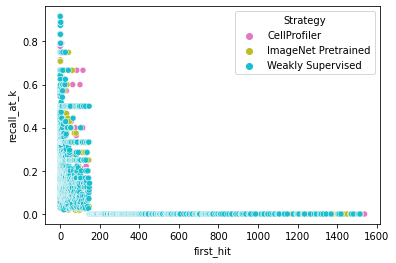

In [ ]:
sb.scatterplot(data=all_results, x="first_hit", y="recall_at_k", hue="Strategy", palette=main_colors)

In [ ]:
trt_index = pd.read_csv(f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental_results/{folder}/BBBC036_MOA_MATCHES_official.csv")

In [13]:
df = pd.DataFrame([{"Strategy":"CellProfiler","Enrichment":25.984500714278,"mAP":0.0518128611597967, "First-Hit":418},
                   #{"Strategy":"ImageNet Pretrained","Enrichment":25.7911687507445,"mAP":0.0533072411273362, "First-Hit":441},
                   {"Strategy":"ImageNet Pretrained","Enrichment":26.828974894436,"mAP":0.0578851423665469, "First-Hit":441},
                   #{"Strategy":"WSL - Combined Set Plates Out","Enrichment":34.1308737703191,"mAP":0.0652484568483157, "First-Hit":463},
                   {"Strategy":"WSL - Combined Set Cells Out","Enrichment":33.2222281785317,"mAP":0.0649511152129254, "First-Hit":454},
                   #{"Strategy":"WSL - Individual Set Plates Out","Enrichment":36.1000844226027,"mAP":0.0645857577477211, "First-Hit":470},
                   {"Strategy":"WSL - Individual Set Cells Out","Enrichment":34.88319746873213,"mAP":0.0667421590502184, "First-Hit":459}])
df

,Strategy,Enrichment,mAP,First-Hit
0,CellProfiler,25.984501,0.051813,418
1,ImageNet Pretrained,26.828975,0.057885,441
2,WSL - Combined Set Cells Out,33.222228,0.064951,454
3,WSL - Individual Set Cells Out,34.883197,0.066742,459


In [14]:
#main_colors = ["tab:pink","tab:olive","tab:cyan", "tab:cyan", "tab:green", "tab:green"]
#main_markers = ['o', 'o', 'D', 'o', 'D', 'o']
main_colors = ["tab:pink","tab:olive","tab:cyan", "tab:green"]
main_markers = ['o', 'o', 'o', 'o']

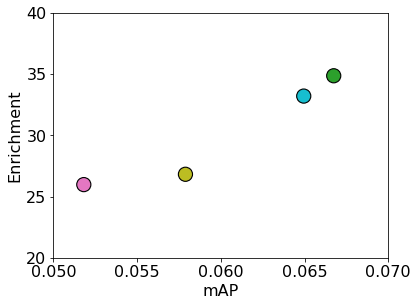

In [15]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(6,4.5))
sb.scatterplot(data=df, x="mAP", y="Enrichment", hue="Strategy", s=200, edgecolor="black", palette=main_colors, style = 'Strategy', markers = main_markers)
t = ax.set_xlim([0.05, 0.07])

t = ax.set_ylim([20, 40])
plt.legend(loc='upper left')
ax.get_legend().remove()


In [ ]:
df = pd.DataFrame([{"Strategy":"CellProfiler","Enrichment":25.984500714278,"mAP":0.0518128611597967, "First-Hit":418},
                   {"Strategy":"ImageNet Pretrained","Enrichment":26.828974894436,"mAP":0.0578851423665469, "First-Hit":441},
                   {"Strategy":"WSL - Combined Set Cells Out","Enrichment":33.2222281785317,"mAP":0.0649511152129254, "First-Hit":454},
                   {"Strategy":"WSL - Individual Set Cells Out","Enrichment":34.88319746873213,"mAP":0.0667421590502184, "First-Hit":459},
                   {"Strategy":"WSL - Combined Set Cells Out Masks","Enrichment":28.7323274738863,"mAP":0.0598689234883936, "First-Hit":459}])
df

,Strategy,Enrichment,mAP,First-Hit
0,CellProfiler,25.984501,0.051813,418
1,ImageNet Pretrained,26.828975,0.057885,441
2,WSL - Combined Set Cells Out,33.222228,0.064951,454
3,WSL - Individual Set Cells Out,34.883197,0.066742,459
4,WSL - Combined Set Cells Out Masks,28.732327,0.059869,459


In [ ]:
main_colors = ["tab:pink","tab:olive","tab:cyan", "tab:green", "tab:gray"]
main_markers = ['o', 'o', 'o', 'o', 'o']

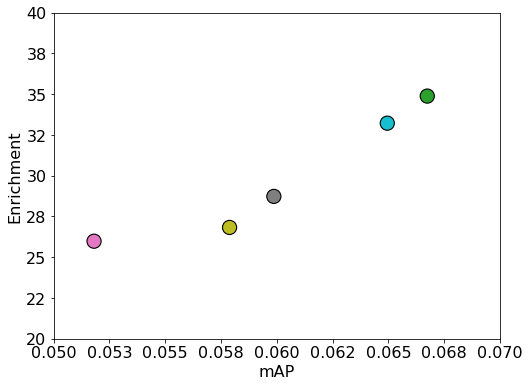

In [ ]:
from matplotlib.ticker import FormatStrFormatter
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(8,6))
sb.scatterplot(data=df, x="mAP", y="Enrichment", hue="Strategy", s=200, edgecolor="black", palette=main_colors, style = 'Strategy', markers = main_markers)
t = ax.set_xlim([0.05, 0.07])
t = ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
t = ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
t = ax.set_ylim([20, 40])
plt.legend(loc='upper left')
ax.get_legend().remove()


In [8]:
df = pd.DataFrame([{"Strategy":"CellProfiler","Enrichment":25.984500714278,"mAP":0.0518128611597967, "First-Hit":418},
                   #{"Strategy":"ImageNet Pretrained","Enrichment":26.828974894436,"mAP":0.0578851423665469, "First-Hit":441},
                   #{"Strategy":"WSL - Combined Set Plates Out","Enrichment":34.1308737703191,"mAP":0.0652484568483157, "First-Hit":463},
                   #{"Strategy":"WSL - Combined Set Cells Out","Enrichment":33.2222281785317,"mAP":0.0649511152129254, "First-Hit":454},
                   #{"Strategy":"WSL - Individual Set Plates Out","Enrichment":36.1000844226027,"mAP":0.0645857577477211, "First-Hit":470},
                   {"Strategy":"WSL - Individual Set Cells Out","Enrichment":34.88319746873213,"mAP":0.0667421590502184, "First-Hit":459},
                   #{"Strategy":"WSL - Individual Strong Set Plates Out","Enrichment":29.4022712467629,"mAP":0.0616547599383968, "First-Hit":0},
                   {"Strategy":"WSL - Individual Strong Set Cells Out","Enrichment":31.0650379426915,"mAP":0.0632120226976001, "First-Hit":0},
                   #{"Strategy":"WSL - Individual Median Set Plates Out","Enrichment":29.3969579122685,"mAP":0.0600462455884156, "First-Hit":0},
                   {"Strategy":"WSL - Individual Median Set Cells Out","Enrichment":31.683492676878,"mAP":0.0612768403686095, "First-Hit":0},
                   #{"Strategy":"WSL - Individual Weak Set Plates Out","Enrichment":31.9105934985714,"mAP":0.0564450749063246, "First-Hit":0},
                   {"Strategy":"WSL - Individual Weak Set Cells Out","Enrichment":24.3772614030211,"mAP":0.0566378006360128, "First-Hit":0}
                   ])
df

,Strategy,Enrichment,mAP,First-Hit
0,CellProfiler,25.984501,0.051813,418
1,WSL - Individual Set Cells Out,34.883197,0.066742,459
2,WSL - Individual Strong Set Cells Out,31.065038,0.063212,0
3,WSL - Individual Median Set Cells Out,31.683493,0.061277,0
4,WSL - Individual Weak Set Cells Out,24.377261,0.056638,0


In [11]:
#main_colors = ["tab:pink","tab:olive","tab:cyan", "tab:cyan", "tab:green", "tab:green", "tab:red", "tab:red", "tab:orange", "tab:orange", "tab:blue", "tab:blue"]
#main_markers = ['o', 'o', 'D', 'o', 'D', 'o', 'D', 'o', 'D', 'o', 'D', 'o']
#main_colors = ["tab:pink","tab:olive","tab:cyan", "tab:green", "tab:red",  "tab:orange", "tab:blue"]
#main_markers = ['o', 'o', 'o', 'o', 'o', 'o', 'o']
main_colors = ["tab:pink", "tab:green", "tab:red",  "tab:orange", "tab:blue"]
main_markers = ['o', 'o', 'o', 'o', 'o']

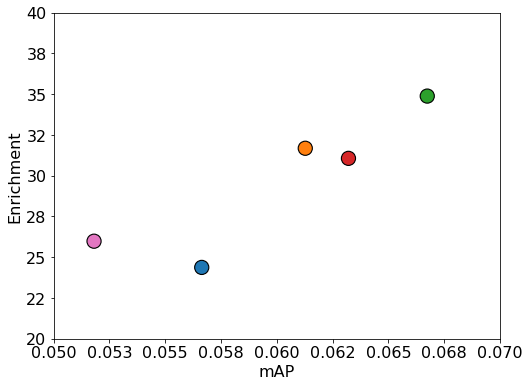

In [12]:
from matplotlib.ticker import FormatStrFormatter
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(8,6))
sb.scatterplot(data=df, x="mAP", y="Enrichment", hue="Strategy", s=200, edgecolor="black", palette=main_colors, style = 'Strategy', markers = main_markers)
t = ax.set_xlim([0.05, 0.07])
t = ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
t = ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
t = ax.set_ylim([20, 40])
plt.legend(loc='upper left')
ax.get_legend().remove()

In [ ]:
full_results = pd.merge(all_results, trt_index, left_on=["Compound"], right_on=["Var1"])
full_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4095 entries, 0 to 4094
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           4095 non-null   int64  
 1   index_x         4095 non-null   int64  
 2   Compound        4095 non-null   object 
 3   Treatment       4095 non-null   object 
 4   first_hit       4095 non-null   int64  
 5   top_percent     4095 non-null   float64
 6   Strategy        4095 non-null   object 
 7   index_y         4095 non-null   int64  
 8   Var1_x          4095 non-null   object 
 9   percentile      4095 non-null   float64
 10  threshold       4095 non-null   float64
 11  ods_ratio       4095 non-null   float64
 12  p-value         4095 non-null   float64
 13  V               4095 non-null   object 
 14  precision_at_k  4095 non-null   float64
 15  pk              4095 non-null   float64
 16  recall_at_k     4095 non-null   float64
 17  rk              4095 non-null   f

In [ ]:
stats = full_results.groupby(["Metadata_moa.x", "Strategy"])[["first_hit", "top_percent","ods_ratio","precision_at_k"]].mean().reset_index()
counts = full_results.groupby(["Metadata_moa.x", "Strategy"])["first_hit"].count().reset_index()
stats = pd.merge(stats, counts.rename({"first_hit":"counts"}, axis=1), on=["Metadata_moa.x","Strategy"])

In [ ]:
main_colors = ["tab:pink","tab:olive","tab:cyan"] 
high_colors = ["deeppink", "gold", "deepskyblue"]

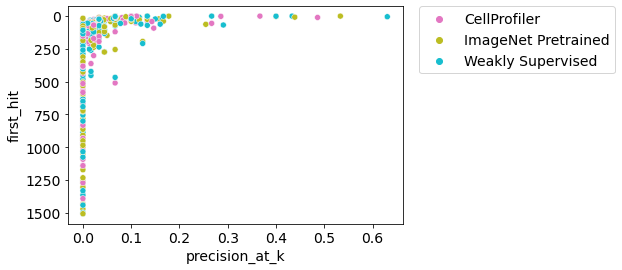

In [ ]:

g = sb.scatterplot(data=stats[stats.counts >= 2], x="precision_at_k", y="first_hit", hue="Strategy", palette=main_colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.invert_yaxis()

<BarContainer object of 404 artists>

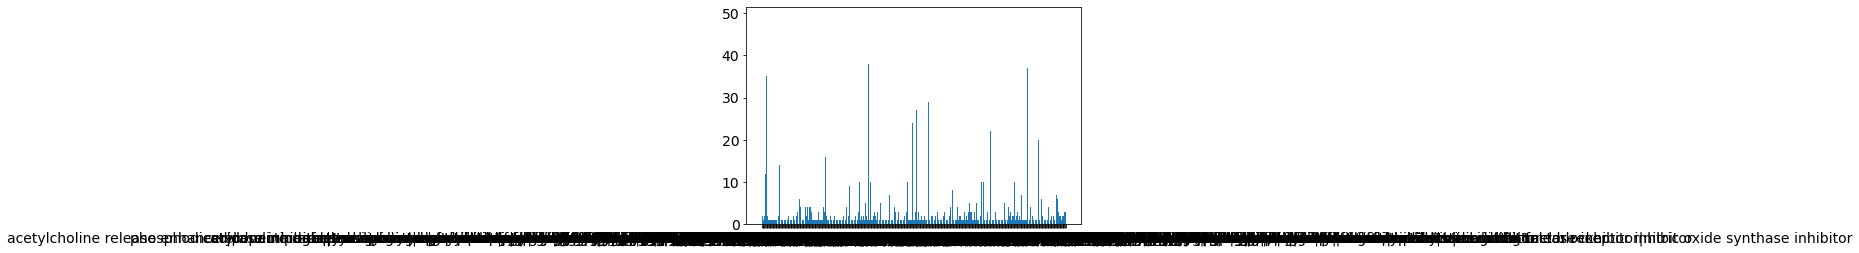

In [ ]:
plt.bar(stats[stats.Strategy == "CellProfiler"]["Metadata_moa.x"], stats[stats.Strategy == "CellProfiler"].counts)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


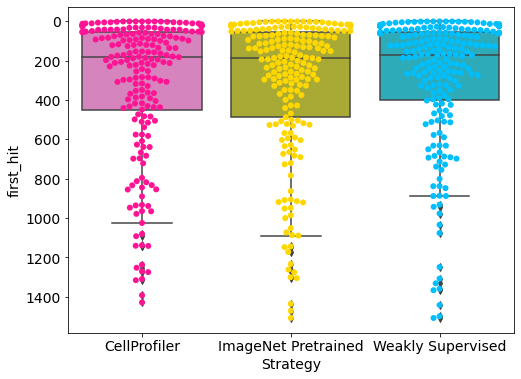

In [ ]:
plt.figure(figsize=(8,6))
g = sb.swarmplot(data=stats[stats.counts >= 2], x="Strategy", y="first_hit", size=6, palette=high_colors)
g = sb.boxplot(data=stats[stats.counts >= 2], x="Strategy", y="first_hit", palette=main_colors)
g.invert_yaxis()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


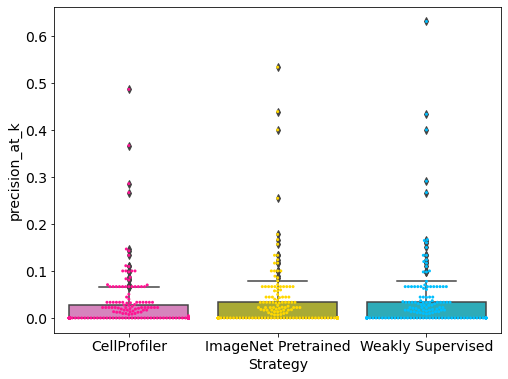

In [ ]:
plt.figure(figsize=(8,6))
g = sb.swarmplot(data=stats[stats.counts >= 2], x="Strategy", y="precision_at_k", size=3, palette=high_colors)
g = sb.boxplot(data=stats[stats.counts >= 2], x="Strategy", y="precision_at_k", palette=main_colors)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 70.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


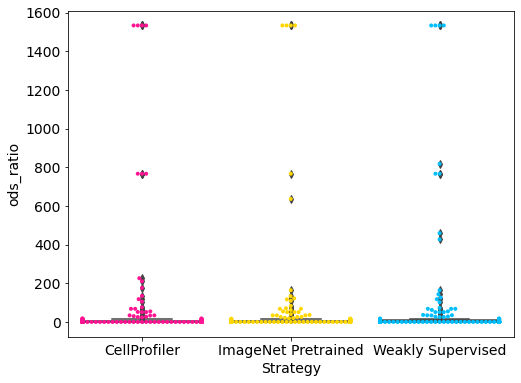

In [ ]:
plt.figure(figsize=(8,6))
g = sb.swarmplot(data=stats[stats.counts >= 2], x="Strategy", y="ods_ratio", size=4, palette=high_colors)
g = sb.boxplot(data=stats[stats.counts >= 2], x="Strategy", y="ods_ratio", palette=main_colors)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 0.19)

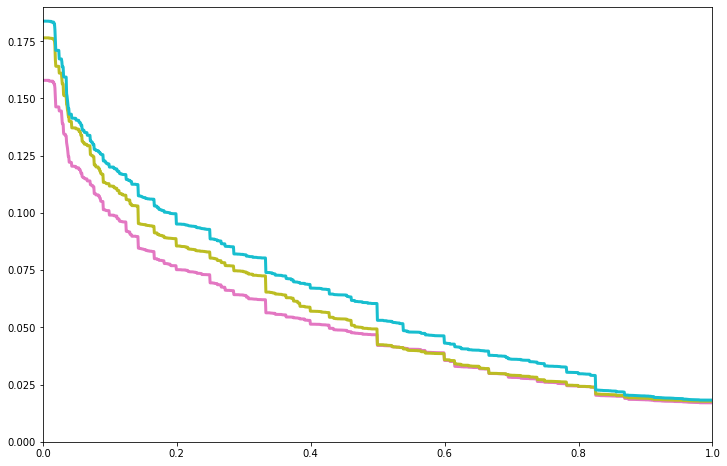

In [ ]:
with open(f"{map_path}{folder_names[0]}{partitions[0]}{file_names[0]}_{sphering_params_epoch[0]}.pkl", "rb") as in_file:
    cp_results = pickle.load(in_file) 

with open(f"{map_path}{folder_names[1]}{partitions[1]}{file_names[1]}_{sphering_params_epoch[1]}.pkl", "rb") as in_file:
    en_results = pickle.load(in_file) 

with open(f"{map_path}{folder_names[2]}{partitions[2]}{file_names[2]}_{sphering_params_epoch[2]}.pkl", "rb") as in_file:
    en2_results = pickle.load(in_file)

plt.figure(figsize=(12,8))
sb.lineplot(cp_results["recall_axis"], cp_results["precision_axis"], color=main_colors[0], linewidth = 3)
sb.lineplot(en_results["recall_axis"], en_results["precision_axis"], color=main_colors[1], linewidth = 3)
g = sb.lineplot(en2_results["recall_axis"], en2_results["precision_axis"], color=main_colors[2], linewidth = 3)
g.set_xlim(0,1.)
g.set_ylim(0,0.19)
#plt.gca().legend(('CellProfiler', 'ImageNet pretrained', 'Trained on Cell Painting'),fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

(0.9, 5.1)

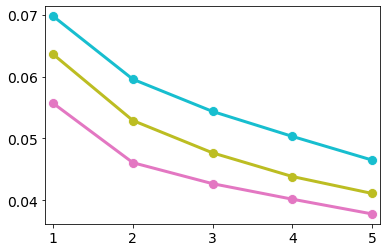

In [ ]:
start, stop = 0,5
sb.lineplot(range(start+1,stop+1), cp_results["precision_at_k"][start:stop], color=main_colors[0], linewidth = 3)
sb.scatterplot(range(start+1,stop+1), cp_results["precision_at_k"][start:stop], color=main_colors[0], s=100)

sb.lineplot(range(start+1,stop+1), en_results["precision_at_k"][start:stop], color=main_colors[1], linewidth = 3)
sb.scatterplot(range(start+1,stop+1), en_results["precision_at_k"][start:stop], color=main_colors[1], s=100)

g = sb.lineplot(range(start+1,stop+1), en2_results["precision_at_k"][start:stop], color=main_colors[2], linewidth = 3)
g = sb.scatterplot(range(start+1,stop+1), en2_results["precision_at_k"][start:stop], color=main_colors[2], s=100)
g.set_xlim(0.9,stop+0.1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.015, 0.07)

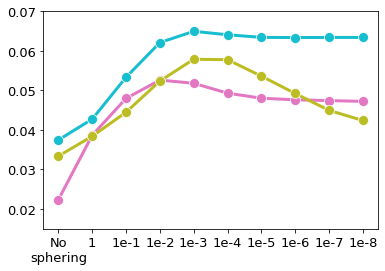

In [ ]:
sphering_params_comparison = ['no', '1', '1e-1', '1e-2', '1e-3', '1e-4', '1e-5', '1e-6', '1e-7', '1e-8']
sphering_params_comparison_axis = ['No' + "\n" + 'sphering', '1', '1e-1', '1e-2', '1e-3', '1e-4', '1e-5', '1e-6', '1e-7', '1e-8']

cellprofiler_map = []
imagenet_map = []
combinedset_map = []

for sp in range(len(sphering_params_comparison)):
  with open(f"{map_path}{folder_names[0]}{partitions[0]}{file_names[0]}_{sphering_params_comparison[sp]}.pkl", "rb") as in_file:
    cp_results = pickle.load(in_file)
    cellprofiler_map.append(cp_results['mean_average_precision'])

  with open(f"{map_path}{folder_names[1]}{partitions[1]}{file_names[1]}_{sphering_params_comparison[sp]}.pkl", "rb") as in_file:
     en_results = pickle.load(in_file)
     imagenet_map.append(en_results['mean_average_precision'])

  with open(f"{map_path}{folder_names[2]}{partitions[2]}{file_names[2]}_{sphering_params_comparison[sp]}_e30.pkl", "rb") as in_file:
      en2_results = pickle.load(in_file)
      combinedset_map.append(en2_results['mean_average_precision'])
      

plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 13})
sb.lineplot(sphering_params_comparison_axis, cellprofiler_map, color=main_colors[0], linewidth = 3, marker='o', markersize=10)
sb.lineplot(sphering_params_comparison_axis, imagenet_map, color=main_colors[1], linewidth = 3, marker='o', markersize=10)
g = sb.lineplot(sphering_params_comparison_axis, combinedset_map, color=main_colors[2], linewidth = 3, marker='o', markersize=10)
g.set_ylim(0.015, 0.07)
#plt.gca().legend(('CellProfiler', 'ImageNet pretrained', 'Trained on Cell Painting'),fontsize=16)

In [ ]:
df = pd.DataFrame([{"Strategy":"CellProfiler","Enrichment":25.984500714278,"mAP":0.0518128611597967, "First-Hit":418},
                   {"Strategy":"ImageNet Pretrained","Enrichment":26.828974894436,"mAP":0.0578851423665469, "First-Hit":441},
                   {"Strategy":"WSL - Combined Set Plates Out","Enrichment":34.1308737703191,"mAP":0.0652484568483157, "First-Hit":463},
                   {"Strategy":"WSL - Individual Set Plates Out","Enrichment":36.1000844226027,"mAP":0.0645857577477211, "First-Hit":470},
                   {"Strategy":"WSL - Individual Set Strong Treatments Plates Out","Enrichment":29.84837065845,"mAP":0.0623413199349766, "First-Hit":459}])
df

,Strategy,Enrichment,mAP,First-Hit
0,CellProfiler,25.984501,0.051813,418
1,ImageNet Pretrained,26.828975,0.057885,441
2,WSL - Combined Set Plates Out,34.130874,0.065248,463
3,WSL - Individual Set Plates Out,36.100084,0.064586,470
4,WSL - Individual Set Strong Treatments Plates Out,29.848371,0.062341,459


In [ ]:
main_colors = ["tab:pink","tab:olive","tab:cyan", "tab:green", "tab:blue"]
main_markers = ['o', 'o', 'D', 'D', 'D']

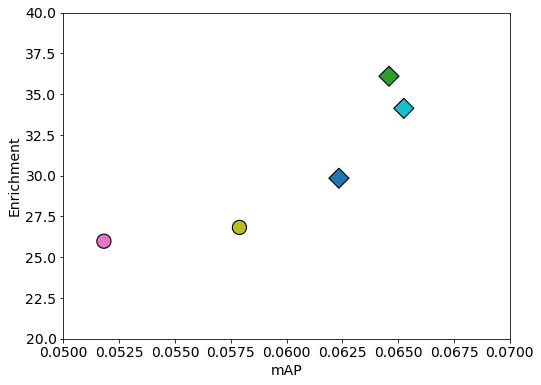

In [ ]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(8,6))
sb.scatterplot(data=df, x="mAP", y="Enrichment", hue="Strategy", s=200, edgecolor="black", palette=main_colors, style = 'Strategy', markers = main_markers)
t = ax.set_xlim([0.05, 0.07])
t = ax.set_ylim([20, 40])
plt.legend(loc='upper left')
ax.get_legend().remove()
